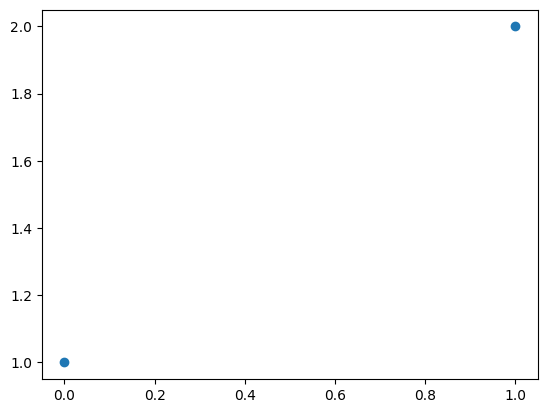

In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_forward2
import seis_test
#plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

Mismatch to hosts: 3.544453883175856e-05
adjoint 5.346471963069144e-18 4.9042632427831433e-05
diff 1.574739655544795e-13 1.658886008067652e-07
Mismatch to hosts: 1.5741465383079042e-05
adjoint 8.592302216947623e-18 0.0001352831488805387
diff 1.1770732250346666e-13 1.4481413612063529e-07
7.688010805914319e-16 1.0873080213968933e-11
All tests passed!
CPU times: total: 18.7 s
Wall time: 19.6 s


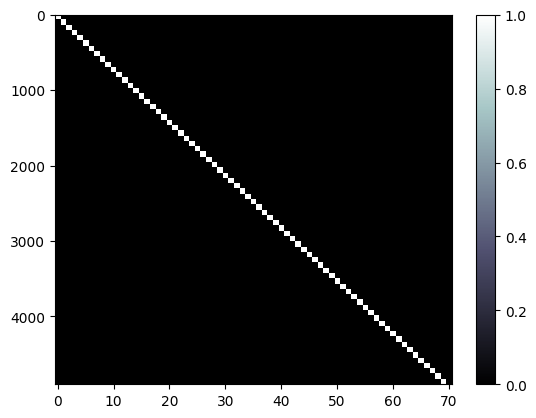

In [31]:
%%time
importlib.reload(kgs)
importlib.reload(seis_test)
importlib.reload(seis_forward2)
seis_test.run_all_tests(test_reference_mode=True)


In [8]:
import cupy as cp
import time
importlib.reload(seis_forward2)

d = kgs.load_all_train_data()[0]
d.load_to_memory()    
vec = d.velocity.to_vector()
d2 = kgs.load_all_train_data()[1]
d2.load_to_memory()    
vec2 = d2.velocity.to_vector()

kgs.profiling=False
seis_forward2.profiling=True
seis_forward2.reset_profile()
t=time.time()
for ii in range(5):
    result, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec)#, vec_adjoint = cp.zeros((5*999*70,1), dtype=kgs.base_type_gpu))
    result2, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec2)
print(kgs.rms(result - d.seismogram.to_vector()))
print(kgs.rms(result2 - d2.seismogram.to_vector()))
print(time.time()-t)
seis_forward2.show_profile()

3.274694026346925e-05
3.176099982855424e-05
2.141552448272705
init: 0.00
prep for source loop: 0.01
prep for time loop: 0.01
time loop: 2.09
extract seis: 0.03
finish: 0.00


In [12]:
import seis_forward_temp
kgs.profiling=True
importlib.reload(seis_forward_temp)
result2 = seis_forward_temp.vel_to_seis(vec)[0]
kgs.rms(result2-result)

Timer unit: 1e-07 s

Total time: 0.274313 s
File: f:\seismic/code/core\seis_forward_temp.py
Function: vel_to_seis at line 12

Line #      Hits         Time  Per Hit   % Time  Line Contents
    12                                           @kgs.profile_each_line
    13                                           def vel_to_seis(vec, vec_diff=None, vec_adjoint=None, adjoint_on_residual=False):
    14                                               # Outputs:
    15                                               # result: the seismogram associated with velocity field vec
    16                                               # result_diff: J@vec_diff, where J is the Jacobian of the operation above
    17                                               # result_adjoint: J^T@vec_adjoint, or J^T@(result-vec_adjoint) if adjoint_on_residual=True
    18         1         12.0     12.0      0.0      assert vec.shape == (4901,1)
    19         1          3.0      3.0      0.0      assert vec_adjoint is Non

array(1.74392932)

In [ ]:
np.arange(0,5)

In [ ]:
np.arange(4,-1,-1)